In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
yoy = pd.read_csv("c:\data\COBA PROJECT\DATA\VISUALISASI\yoy_produktivitas.csv")
yoy

,provinsi,tahun,produktivitas,yoy_pct
0,ACEH,2020,0.55,NaN
1,ACEH,2021,0.56,1.82
2,ACEH,2022,0.58,3.57
3,ACEH,2023,0.57,-1.72
4,ACEH,2024,0.52,-8.77
...,...,...,...,...
185,SUMATERA UTARA,2020,0.58,NaN
186,SUMATERA UTARA,2021,0.62,6.90
187,SUMATERA UTARA,2022,0.63,1.61
188,SUMATERA UTARA,2023,0.64,1.59


In [19]:
yoy.head()
yoy_wide = (
    yoy
    .pivot(index="provinsi", columns="tahun", values="yoy_pct")
    .reset_index()
)

In [20]:
yoy_wide = yoy_wide.rename(columns={
    2021: "yoy_2020-2021",
    2022: "yoy_2021-2022",
    2023: "yoy_2022-2023",
    2024: "yoy_2023-2024"
})
yoy_wide = yoy_wide.drop(columns=[2020], errors="ignore")
yoy_wide.head()

tahun,provinsi,yoy_2020-2021,yoy_2021-2022,yoy_2022-2023,yoy_2023-2024
0,ACEH,1.82,3.57,-1.72,-8.77
1,BALI,11.36,6.12,-1.92,0.00
2,BANTEN,-1.45,13.24,-2.60,-20.00
3,BENGKULU,8.77,11.29,-7.25,0.00
4,DI YOGYAKARTA,-5.56,0.00,5.88,-7.41


In [ ]:
#yoy lengkap 2020-2024
yoy_wide = yoy_wide.set_index("provinsi")
plt.figure(figsize=(12, 20))
ax = sns.heatmap(
    yoy_wide,
    cmap="RdYlGn",
    center=0,
    linewidths=0.3,
    linecolor="white",
    annot=False
)
ax.set_yticks(range(len(yoy_wide.index)))
ax.set_yticklabels(yoy_wide.index, fontsize=9)

plt.title(
    "Heatmap YoY Produktivitas Pertanian per Provinsi (%)",
    fontsize=14,
    pad=16
)
plt.xlabel("Periode")
plt.ylabel("Provinsi")

plt.tight_layout()
plt.show()

In [22]:
#ksenjangan yoy 
yoy_wide["avg_yoy"] = yoy_wide.mean(axis=1)

top10 = yoy_wide.sort_values("avg_yoy", ascending=False).head(10)
bottom10 = yoy_wide.sort_values("avg_yoy").tail(10)

heatmap_data = pd.concat([top10, bottom10])


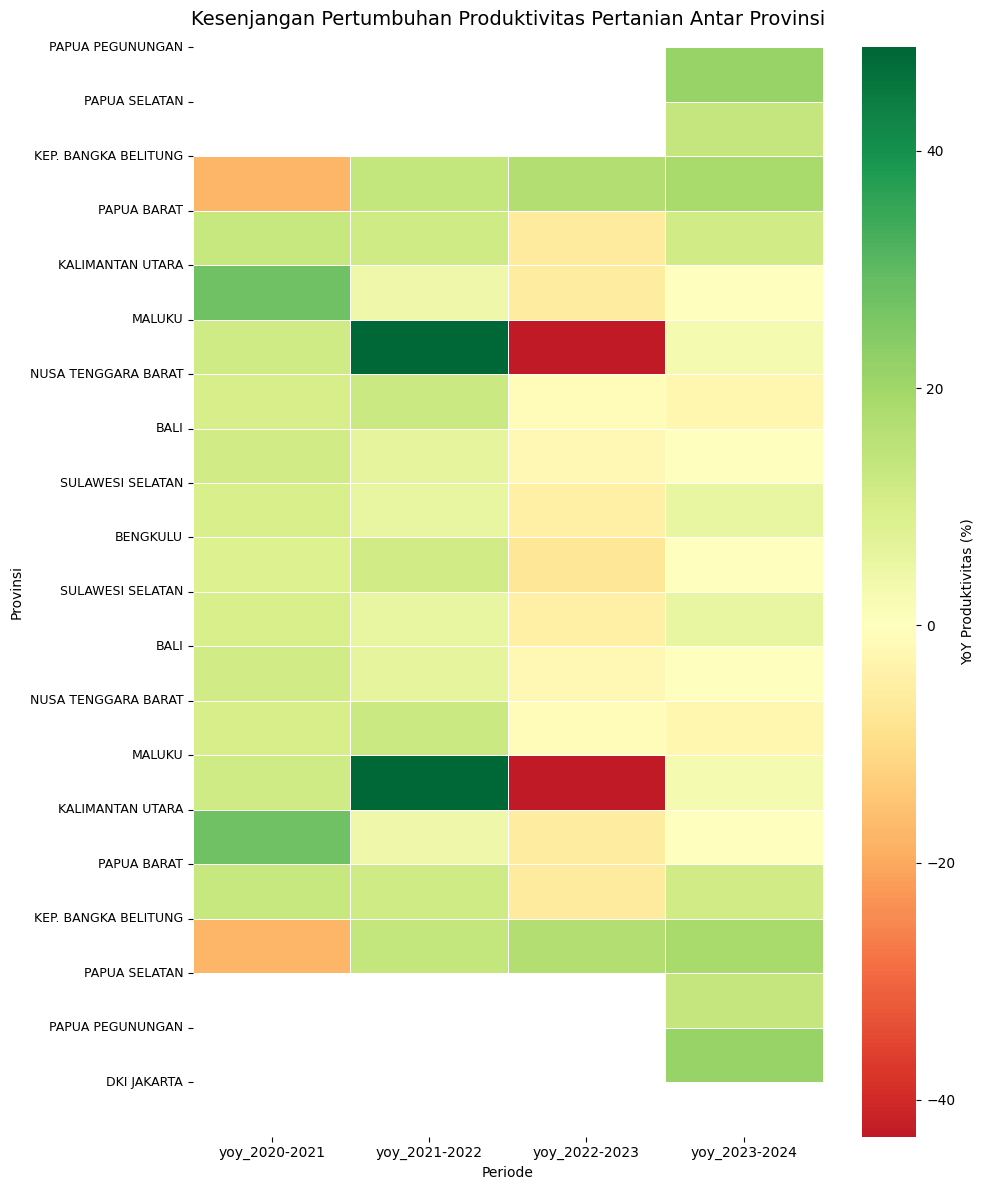

In [23]:
#lanjutan kesenjangan yoy
plt.figure(figsize=(10, 12))

ax = sns.heatmap(
    heatmap_data.drop(columns="avg_yoy"),
    cmap="RdYlGn",
    center=0,
    linewidths=0.4,
    linecolor="white",
    cbar_kws={"label": "YoY Produktivitas (%)"}
)

ax.set_yticks(range(len(heatmap_data.index)))
ax.set_yticklabels(heatmap_data.index, fontsize=9)

plt.title(
    "Kesenjangan Pertumbuhan Produktivitas Pertanian Antar Provinsi",
    fontsize=14,
    pad=16
)
plt.xlabel("Periode")
plt.ylabel("Provinsi")

plt.tight_layout()
plt.show()


In [24]:
yield_growth = pd.read_csv("c:\data\COBA PROJECT\DATA\VISUALISASI\yield_growth.csv")
yield_growth[["baseline_yield","yield_2024"]] = yield_growth[["baseline_yield","yield_2024"]] * 10
yield_growth.head()

,provinsi,baseline_yield,yield_2024,growth_since_start
0,PAPUA BARAT,3.8,5.0,31.58
1,KEP. BANGKA BELITUNG,4.4,5.7,29.55
2,KALIMANTAN UTARA,4.0,5.0,25.00
3,PAPUA PEGUNUNGAN,4.2,5.1,21.43
4,NUSA TENGGARA BARAT,5.9,7.0,18.64


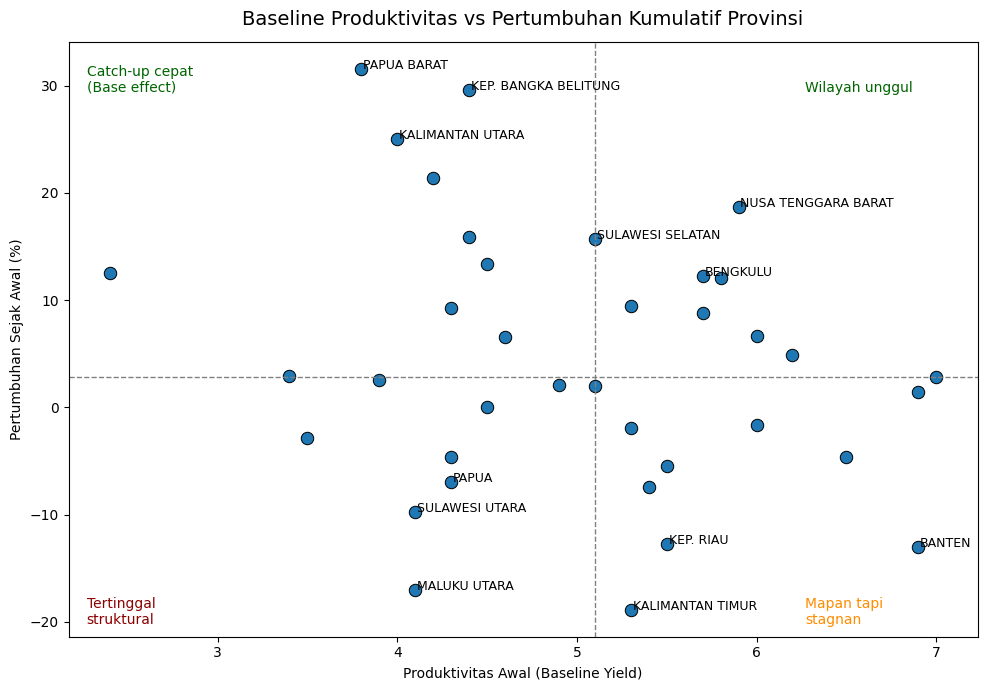

In [25]:
plt.figure(figsize=(10, 7))
ax = sns.scatterplot(
    data=yield_growth,
    x="baseline_yield",
    y="growth_since_start",
    s=80,
    color="#1f77b4",
    edgecolor="black"
)

# Garis median
x_med = yield_growth["baseline_yield"].median()
y_med = yield_growth["growth_since_start"].median()

x_med = yield_growth["baseline_yield"].median()
y_med = yield_growth["growth_since_start"].median()

q1 = yield_growth[(yield_growth["baseline_yield"] < x_med) &
               (yield_growth["growth_since_start"] >= y_med)] \
     .nlargest(3, "growth_since_start")

q2 = yield_growth[(yield_growth["baseline_yield"] >= x_med) &
               (yield_growth["growth_since_start"] >= y_med)] \
     .nlargest(3, "growth_since_start")

q3 = yield_growth[(yield_growth["baseline_yield"] < x_med) &
               (yield_growth["growth_since_start"] < y_med)] \
     .nsmallest(3, "growth_since_start")

q4 = yield_growth[(yield_growth["baseline_yield"] >= x_med) &
               (yield_growth["growth_since_start"] < y_med)] \
     .nsmallest(3, "growth_since_start")

highlight = pd.concat([q1, q2, q3, q4])

plt.axvline(x_med, linestyle="--", color="gray", linewidth=1)
plt.axhline(y_med, linestyle="--", color="gray", linewidth=1)

# Ambil batas axis
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()

# Label kuadran
plt.text(
    x_min + 0.02*(x_max - x_min),
    y_med + 0.85*(y_max - y_med),
    "Catch-up cepat\n(Base effect)",
    fontsize=10,
    color="darkgreen"
)

plt.text(
    x_med + 0.55*(x_max - x_med),
    y_med + 0.85*(y_max - y_med),
    "Wilayah unggul",
    fontsize=10,
    color="darkgreen"
)

plt.text(
    x_min + 0.02*(x_max - x_min),
    y_min + 0.05*(y_med - y_min),
    "Tertinggal\nstruktural",
    fontsize=10,
    color="darkred"
)

plt.text(
    x_med + 0.55*(x_max - x_med),
    y_min + 0.05*(y_med - y_min),
    "Mapan tapi\nstagnan",
    fontsize=10,
    color="darkorange"
)

plt.title(
    "Baseline Produktivitas vs Pertumbuhan Kumulatif Provinsi",
    fontsize=14,
    pad=12
)
for _, row in highlight.iterrows():
    plt.text(
        row["baseline_yield"] + 0.01,
        row["growth_since_start"],
        row["provinsi"],
        fontsize=9
    )
plt.xlabel("Produktivitas Awal (Baseline Yield)")
plt.ylabel("Pertumbuhan Sejak Awal (%)")

plt.tight_layout()
plt.show()


In [26]:
Area_growth = pd.read_csv("c:\data\COBA PROJECT\DATA\VISUALISASI\Area_growth.csv")
Area_growth.head()

,provinsi,baseline_area,area_2024,growth_since_start(percentage)
0,PAPUA SELATAN,15.32,408.72,2567.9
1,KALIMANTAN BARAT,4721.73,19449.93,311.9
2,SULAWESI BARAT,2297.16,6019.31,162.0
3,BENGKULU,4145.68,9861.27,137.9
4,RIAU,138.92,327.17,135.5


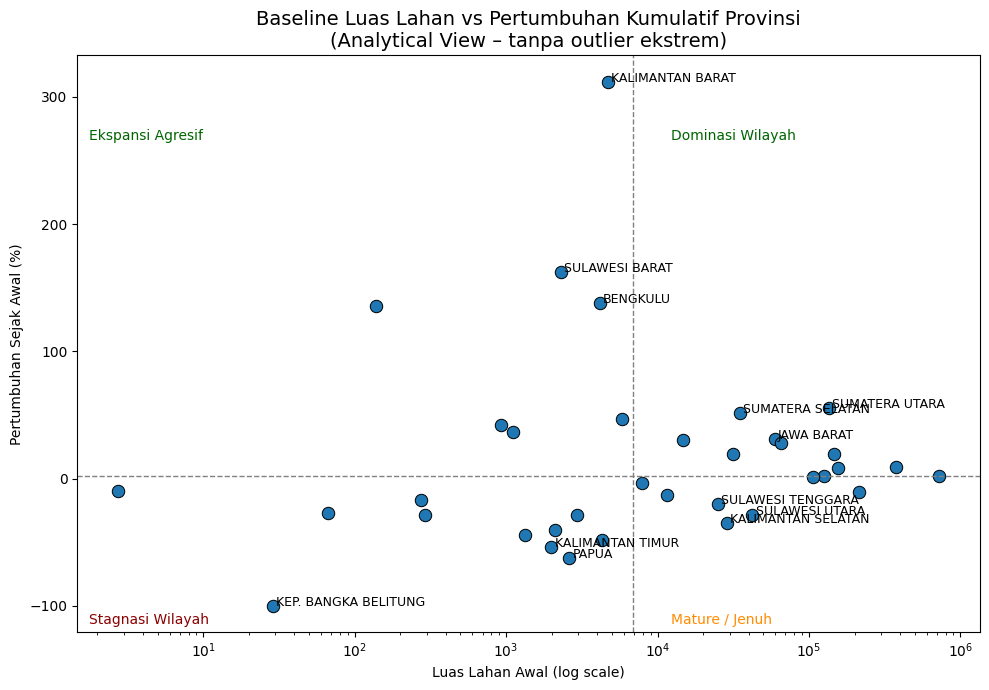

In [27]:
#TANPA PAPUA SELATAN
outlier_prov = ["PAPUA SELATAN"]
df_main = Area_growth[~Area_growth["provinsi"].isin(outlier_prov)]

plt.figure(figsize=(10, 7))
ax = sns.scatterplot(
    data=df_main,
    x="baseline_area",
    y="growth_since_start(percentage)",
    s=80,
    color="#1f77b4",
    edgecolor="black"
)

# LOG SCALE
ax.set_xscale("log")

# MEDIAN
x_med = df_main["baseline_area"].median()
y_med = df_main["growth_since_start(percentage)"].median()

plt.axvline(x_med, linestyle="--", color="gray", linewidth=1)
plt.axhline(y_med, linestyle="--", color="gray", linewidth=1)

# BATAS AXIS
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()

# LABEL KUADRAN
plt.text(x_min * 1.2, y_med + 0.8 * (y_max - y_med),
         "Ekspansi Agresif", fontsize=10, color="darkgreen")

plt.text(x_med * 1.8, y_med + 0.8 * (y_max - y_med),
         "Dominasi Wilayah", fontsize=10, color="darkgreen")

plt.text(x_min * 1.2, y_min + 0.05 * (y_med - y_min),
         "Stagnasi Wilayah", fontsize=10, color="darkred")

plt.text(x_med * 1.8, y_min + 0.05 * (y_med - y_min),
         "Mature / Jenuh", fontsize=10, color="darkorange")

# HIGHLIGHT 3 PROVINSI PER KUADRAN
q1 = df_main[(df_main["baseline_area"] < x_med) &
             (df_main["growth_since_start(percentage)"] >= y_med)] \
     .nlargest(3, "growth_since_start(percentage)")

q2 = df_main[(df_main["baseline_area"] >= x_med) &
             (df_main["growth_since_start(percentage)"] >= y_med)] \
     .nlargest(3, "growth_since_start(percentage)")

q3 = df_main[(df_main["baseline_area"] < x_med) &
             (df_main["growth_since_start(percentage)"] < y_med)] \
     .nsmallest(3, "growth_since_start(percentage)")

q4 = df_main[(df_main["baseline_area"] >= x_med) &
             (df_main["growth_since_start(percentage)"] < y_med)] \
     .nsmallest(3, "growth_since_start(percentage)")

highlight = pd.concat([q1, q2, q3, q4])

for _, row in highlight.iterrows():
    plt.text(
        row["baseline_area"] * 1.05,
        row["growth_since_start(percentage)"],
        row["provinsi"],
        fontsize=9
    )

plt.title(
    "Baseline Luas Lahan vs Pertumbuhan Kumulatif Provinsi\n"
    "(Analytical View – tanpa outlier ekstrem)",
    fontsize=14
)

plt.xlabel("Luas Lahan Awal (log scale)")
plt.ylabel("Pertumbuhan Sejak Awal (%)")

plt.tight_layout()
plt.show()

In [ ]:
#DENGAN PAPUA SELATAN
plt.figure(figsize=(10, 7))
ax = sns.scatterplot(
    data=Area_growth,
    x="baseline_area",
    y="growth_since_start(percentage)",
    s=80,
    color="#1f77b4",
    edgecolor="black"
)

# LOG SCALE
ax.set_xscale("log")

# HIGHLIGHT OUTLIER
outliers = Area_growth[Area_growth["provinsi"].isin(outlier_prov)]

plt.scatter(
    outliers["baseline_area"],
    outliers["growth_since_start(percentage)"],
    s=120,
    color="crimson",
    edgecolor="black",
    zorder=5
)

for _, row in outliers.iterrows():
    plt.text(
        row["baseline_area"] * 1.05,
        row["growth_since_start(percentage)"],
        row["provinsi"],
        fontsize=10,
        color="crimson"
    )

plt.title(
    "Ketimpangan Ekstrem Pertumbuhan Luas Lahan Antar Provinsi",
    fontsize=14
)

plt.xlabel("Luas Lahan Awal (log scale)")
plt.ylabel("Pertumbuhan Sejak Awal (%)")

plt.tight_layout()
plt.show()


In [ ]:
area_yield = pd.read_csv("c:\data\COBA PROJECT\DATA\YOY.csv")
area_yield["Yield_Average"] = area_yield["Yield_Average"]*10
area_yield.head(10)

In [ ]:
# Normalisasi ukuran bubble (supaya tidak terlalu besar), grafik lengkap
bubble_size = np.sqrt(area_yield["Area_Average"]) * 10

plt.figure(figsize=(10, 7))

scatter = plt.scatter(
    area_yield["Yield_Average"],
    area_yield["Yield_Avg_YOY(%)"],
    s=bubble_size,
    c=area_yield["Area_Avg_YOY(%)"],   # warna = pertumbuhan luas
    alpha=0.7
)

# Garis kuadran
plt.axhline(0)
plt.axvline(area_yield["Yield_Average"].mean())

# Label provinsi (selective: di sini semua dulu)
for _, row in area_yield.iterrows():
    plt.text(
        row["Yield_Average"] + 0.0005,
        row["Yield_Avg_YOY(%)"] + 0.3,
        row["provinsi"],
        fontsize=9
    )

# Colorbar
cbar = plt.colorbar(scatter)
cbar.set_label("Avg YoY Area (%)")

# Judul & label
plt.title("Bubble Scatter: Yield Level vs Yield Growth per Provinsi")
plt.xlabel("Average Yield")
plt.ylabel("Average YoY Yield (%)")

plt.grid(True)
plt.show()

In [10]:
area_yield["yield_yoy_clip"] = area_yield["Yield_Avg_YOY(%)"].clip(-10, 10)
bubble_size_log = np.log1p(area_yield["Area_Average"]) * 800

In [ ]:
#grafik clean
# =========================
# PARAMETER UTAMA
# =========================
YOY_THRESHOLD = 7          # % untuk outlier
TOP_AREA_Q = 0.85          # quantile bubble besar

x_mean = area_yield["Yield_Average"].mean()

# Bubble size (log scale)
bubble_size = np.log1p(area_yield["Yield_Average"]) * 800

plt.figure(figsize=(11, 8))

scatter = plt.scatter(
    area_yield["Yield_Average"],
    area_yield["yield_yoy_clip"],
    s=bubble_size,
    c=area_yield["Area_Avg_YOY(%)"],
    alpha=0.7
)

# Garis kuadran
plt.axhline(0)
plt.axvline(x_mean)

# =========================
# LOGIKA SELEKSI LABEL
# =========================

# 1️⃣ Bubble terbesar
big_area = area_yield["Area_Average"] >= area_yield["Area_Average"].quantile(TOP_AREA_Q)

# 2️⃣ Outlier YoY
yoy_outlier = area_yield["yield_yoy_clip"].abs() >= YOY_THRESHOLD

# 3️⃣ Satu provinsi per kuadran
area_yield["quadrant"] = np.select(
    [
        (area_yield["Yield_Average"] >= x_mean) & (area_yield["yield_yoy_clip"] >= 0),
        (area_yield["Yield_Average"] <  x_mean) & (area_yield["yield_yoy_clip"] >= 0),
        (area_yield["Yield_Average"] <  x_mean) & (area_yield["yield_yoy_clip"] <  0),
        (area_yield["Yield_Average"] >= x_mean) & (area_yield["yield_yoy_clip"] <  0),
    ],
    ["Q1", "Q2", "Q3", "Q4"],
    default = "NA"
)

quad_rep = (
    area_yield.sort_values("Area_Average", ascending=False)
      .groupby("quadrant")
      .head(1)
      .index
)

# Gabungkan semua kriteria
label_index = area_yield[big_area | yoy_outlier].index.union(quad_rep)

# =========================
# FUNGSI OFFSET LABEL
# =========================
def label_offset(x, y):
    if x >= x_mean and y >= 0:
        return (0.0005, 0.3)
    elif x < x_mean and y >= 0:
        return (-0.002, 0.3)
    elif x < x_mean and y < 0:
        return (-0.002, -0.4)
    else:
        return (0.0005, -0.4)

# =========================
# DRAW LABEL
# =========================
for _, row in area_yield.loc[label_index].iterrows():
    dx, dy = label_offset(row["Yield_Average"], row["yield_yoy_clip"])
    plt.text(
        row["Yield_Average"] + dx,
        row["yield_yoy_clip"] + dy,
        row["provinsi"],
        fontsize=9,
        weight="bold",
        bbox=dict(boxstyle="round,pad=0.2", fc="white", alpha=0.6)
    )

# =========================
# QUADRANT ANNOTATION
# =========================
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()

plt.text(
    x_max, y_max,
    "Q1\nProduktivitas Tinggi\n& Tumbuh",
    ha="right", va="top",
    fontsize=10, weight="bold",
    color="darkgreen"
)

plt.text(
    x_min, y_max,
    "Q2\nProduktivitas Rendah\nnamun Membaik",
    ha="left", va="top",
    fontsize=10, weight="bold",
    color="darkblue"
)

plt.text(
    x_min, y_min,
    "Q3\nProduktivitas Rendah\n& Menurun",
    ha="left", va="bottom",
    fontsize=10, weight="bold",
    color="darkred"
)

plt.text(
    x_max, y_min,
    "Q4\nProduktivitas Tinggi\ntapi Tertekan",
    ha="right", va="bottom",
    fontsize=10, weight="bold",
    color="darkorange"
)
plt.axhspan(0, y_max, xmin=0.5, xmax=1, alpha=0.03, color="green")
plt.axhspan(0, y_max, xmin=0, xmax=0.5, alpha=0.03, color="blue")
plt.axhspan(y_min, 0, xmin=0, xmax=0.5, alpha=0.03, color="red")
plt.axhspan(y_min, 0, xmin=0.5, xmax=1, alpha=0.03, color="orange")

# =========================
# FINISHING
# =========================
cbar = plt.colorbar(scatter)
cbar.set_label("Avg YoY Area (%)")

plt.title("Bubble Scatter: Yield Level vs Yield Growth (YoY Clipped ±10%)")
plt.xlabel("Average Yield")
plt.ylabel("Average YoY Yield (%)")

plt.grid(True)
plt.show()

In [ ]:
Covariant = pd.read_csv("c:\data\COBA PROJECT\DATA\VISUALISASI\CV.csv")
Covariants

In [7]:
Correlation= pd.read_csv("c:\data\COBA PROJECT\DATA\VISUALISASI\Correlation.csv")
Correlation

,provinsi,Corr_Yield-Area
0,DKI JAKARTA,NaN
1,PAPUA BARAT DAYA,0.991380
2,PAPUA TENGAH,0.959225
3,NUSA TENGGARA BARAT,0.950462
4,PAPUA PEGUNUNGAN,0.947548
5,BENGKULU,0.917636
6,SUMATERA UTARA,0.897714
7,JAWA BARAT,0.881008
8,SULAWESI UTARA,0.801372
9,PAPUA,0.799952
